In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [2]:
df = pd.read_csv("complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [4]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,1495408,1495408,1260243,1495408,937919,491046,560987,1495408,1470423,1355452,203480,882077,1495408,1495408,1495407,1495408,768479,1.495408e+06
unique,2988,18,76,166,218,463288,10,5526,63,23652,3,4,6,2937,8,2,2,NaN
top,2017-09-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,2017-09-08,Closed with explanation,Yes,No,NaN
freq,3553,336054,330136,207899,106939,1035,410681,148685,202407,9383,101681,491384,1123908,3387,1164829,1460124,620101,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.135220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.303398e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.396664e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.012962e+06


In [7]:
# subset only the first 500 entries of the dataset
subset = df[0:500]

In [46]:
# how many products from each company have complaints
product = subset.groupby('Company')['Product'].count().sort_values(ascending= False).head(10)
product = product.to_frame()
print(product)
# TRANSUNION INTERMEDIATE HOLDINGS, INC. is the company in the subset has the most products that received complaints

                                        Product
Company                                        
TRANSUNION INTERMEDIATE HOLDINGS, INC.      150
Experian Information Solutions Inc.          59
EQUIFAX, INC.                                46
JPMORGAN CHASE & CO.                         19
CAPITAL ONE FINANCIAL CORPORATION            11
CITIBANK, N.A.                               10
SYNCHRONY FINANCIAL                           8
WELLS FARGO & COMPANY                         7
AMERICAN EXPRESS COMPANY                      6
Navient Solutions, LLC.                       5


pandas.core.frame.DataFrame

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

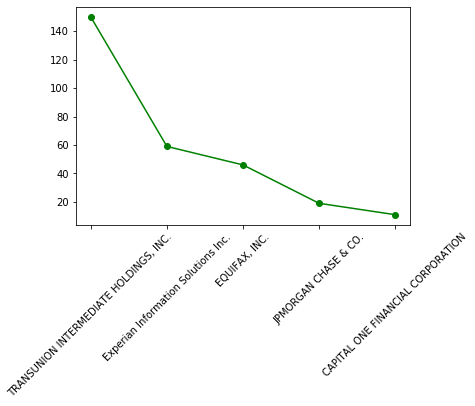

In [72]:
plt.plot(product['Product'], color='green', marker='o', linestyle='solid')
plt.xticks(rotation=45)
# There is a sharp decrease in the number of products from companies that got complaints. 
# Top three companies had the highest number of products with complaints that took a large share of the complaints.

In [48]:
# how many issues from each product have complaints
issue = subset.groupby('Product')['Issue'].count().sort_values(ascending= False).head(10)
issue = issue.to_frame()
print(issue)
# Credit reporting, credit repair services, or other personal consumer reports is the product
# in the subset has the most issues that received complaints

                                                    Issue
Product                                                  
Credit reporting, credit repair services, or ot...    290
Debt collection                                        92
Checking or savings account                            33
Credit card or prepaid card                            31
Mortgage                                               23
Student loan                                           13
Vehicle loan or lease                                   9
Money transfer, virtual currency, or money service      5
Payday loan, title loan, or personal loan               3
Credit card                                             1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

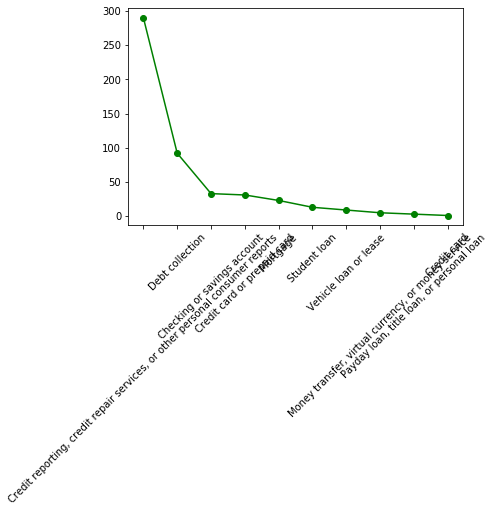

In [73]:
plt.plot(issue['Issue'], color='green', marker='o', linestyle='solid')
plt.xticks(rotation=45)
# There is a sharp decrease in the number of issues from products that got complaints.
# The top issue is about a product focused on Debt collection.

In [49]:
# how many issues from each state
state = subset.groupby('State')['Issue'].count().sort_values(ascending= False).head(10)
state = state.to_frame()
print(state)
# Florida is the state that fires the most complaints

       Issue
State       
FL        66
CA        55
NY        47
GA        35
TX        31
PA        24
IL        23
MI        17
VA        16
NJ        16


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

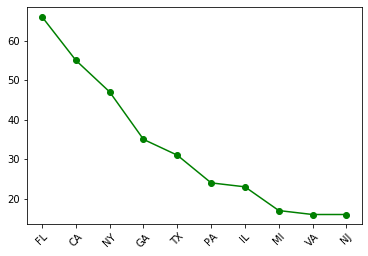

In [75]:
plt.plot(state['Issue'], color='green', marker='o', linestyle='solid')
plt.xticks(rotation=45)
# Top 7 states made the mass majority of the complaints.